# Heartbeat Histogram Analysis

I was facing some issues where after running for a while, the EthernetProtocol heartbeats seem to be failing, closing the transport and restarting the link. Though the link re-starting behavior worked okay, I wanted to see if there was some stochastic behavior in the heartbeats, and a random heartbeat showing up late might be causing the link to flap. That doesn't seem to be the case and the timeout is set pretty high for EthernetProtocol

#### Experiment Setup

A neighbor node, after startup, continually sends heartbeat messages over the Ethernet Protocol (Best-Effort) every 0.25 seconds. The measuring device is simply logging the local time when the data is available in datagram_received().

In [20]:
heartbeats = []
with open("./data/heartbeat-histogram-timestamp.log", 'r') as f:
    heartbeats = f.readlines()

heartbeats = [line for line in heartbeats if 'Received heartbeat' in line]

In [21]:
import datetime

timestamps = [timestamp.split(")")[1] for timestamp in heartbeats]
converted_times = []
for timestamp in timestamps:
    timestamp = timestamp.strip()
    timestamp = float(timestamp)
    
    seconds = int(timestamp)  # Integer part
    nanoseconds = int((timestamp - seconds) * 1e9)  # Fractional part (nanoseconds)
    base_time = datetime.datetime(1970, 1, 1)  # Unix epoch
    delta = datetime.timedelta(seconds=seconds, microseconds=nanoseconds / 1000)
    datetime_obj = base_time + delta
    converted_times.append(datetime_obj)

deltas = [(t2 - t1).total_seconds() for t1, t2 in zip(converted_times[:-1], converted_times[1:])]

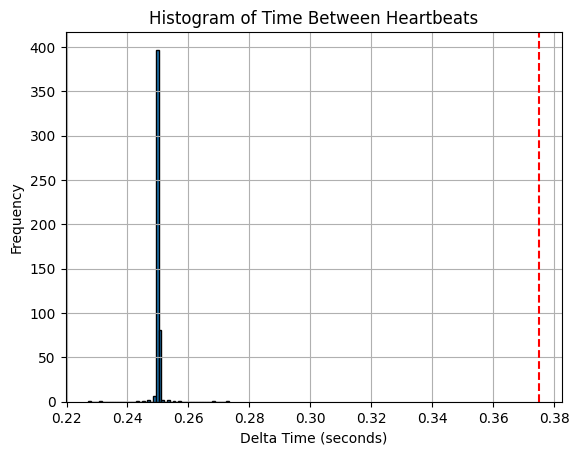

In [22]:
import matplotlib.pyplot as plt

plt.hist(deltas, bins=50, edgecolor='black')
plt.title("Histogram of Time Between Heartbeats")
plt.xlabel("Delta Time (seconds)")
plt.ylabel("Frequency")
plt.axvline(x=0.25 * 1.5, color='red', linestyle='--', label='x = 0.25 * 1.5')
plt.grid(True)
plt.show()